# Mandelbox Generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.image
import os

This function calculates the side length of the Mandelbox from the scale chosen. The equation is taken from Wikipedia.

In [2]:
def get_bound(scale):
    if scale < -1:
        return 4
    elif scale > 1 and scale <= 4*np.sqrt(2)+1:
        return -4*(scale+1.)/(scale-1.)
    return 0

This is the main function that iterates every vector up to 250 times to check for divergence. If it diverges, it saves the iteration it got to when it diverges, and if not, it saves 0 at that position. We assume it diverges if the magnitude of the mapped vector exceeds 10.

In [3]:
max_iterations = 250
def check_diverge(c, dim, scale):
    bound = get_bound(scale)
    z = np.zeros(dim)
    for i in range(max_iterations):
        new_vec = np.zeros(dim)
        for pos,component in enumerate(z):
            if component > 1:
                component = 2 - component
            elif component < -1:
                component = -2 - component
            new_vec[pos] = component
        
        z = new_vec

        if np.linalg.norm(z) < 0.5:
            z = z * 4
        elif np.linalg.norm(z) < 1:
            z = z / np.linalg.norm(z) ** 2
        z = scale * z + c

        if np.linalg.norm(z) > 10:
            return i
    return 0

Since the animation takes so long to run, I saved the numpy arrays in Google Drive, then called matplotlib.image.imsave to save each frame as a .png file. Afterwards, I ran ffmpeg in terminal to generate the animation at 5 frames per second.

In [4]:
filepath = '/Volumes/GoogleDrive/My Drive/mandelbox/out/'
fpath = '/Volumes/GoogleDrive/My Drive/mandelbox/out2/'
fpath2d = '/Volumes/GoogleDrive/My Drive/mandelbox/2d/'

The cell below is for running a 2d Mandelbox. I run through different scales to see the effect that changing the scale had on the appearance of the box.

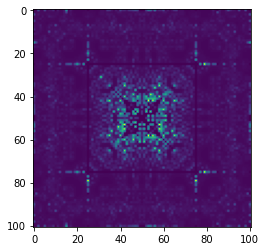

In [20]:
scale_array = np.linspace(-2,2,150)
n = 100 + 1

for idx,scale in enumerate(scale_array):
    
    bound = get_bound(scale)
    llim = -1 * bound/2
    hlim = bound/2

    X = np.linspace(llim,hlim,n)
    Y = np.linspace(llim,hlim,n)
    MSet = np.zeros((n, n))
    for idx_x, x in enumerate(X):
        for idx_y, y in enumerate(Y):
            MSet[idx_x, idx_y] = check_diverge([x, y], 2, scale)

    plt.imshow(MSet)
    if idx < 10:
        np.save(fpath2d + '00' + str(idx) + '.npy',MSet)
    elif idx < 100:
        np.save(fpath2d + '0' + str(idx) + '.npy',MSet)
    else:
        np.save(fpath2d + str(idx) + '.npy',MSet)

The cell below is a plot of at which iteration the points that diverge would diverge at. We can see that most diverge before 25 iterations, and very few diverge afterwards.

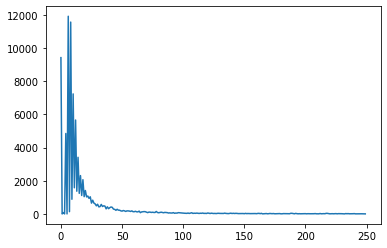

In [194]:
dist = np.zeros((max_iterations))
for i in range(n):
    for j in range(n):
        dist[int(MSet[i,j])] +=1
plt.plot(dist)

This is the 3D Mandelbox generation code. The scale we choose is -1.5. This cell takes very long to run, so proceed with caution.

In [17]:
scale = -1.5
n= 300 + 1
bound = get_bound(scale)
llim = -1 * bound/2
hlim = bound/2

X = np.linspace(llim,hlim,n)
Y = np.linspace(llim,hlim,n)
Z = np.linspace(llim,hlim,n)
for idx_z, z in enumerate(Z):
    MSet = np.zeros((n, n))
    for idx_x, x in enumerate(X):
        for idx_y, y in enumerate(Y):
            MSet[idx_x, idx_y] = check_diverge([x, y, z], 3, scale)
#     np.save(f'out/{idx_z}.npy', MSet)
    np.save(f'{idx_z}.npy', MSet)


In [ ]:
for i in range(301):
    A = np.load(str(i) + '.npy')

This cell saves the arrays as .png files in the same directory.

In [27]:
for i in range(301):
    A = np.load(filepath + str(i) + '.npy')
    if i < 10:
        matplotlib.image.imsave(fpath + '00' + str(i) + '.png', A,cmap='jet')
    elif i < 100:
        matplotlib.image.imsave(fpath + '0' + str(i) + '.png', A,cmap='jet')
    else:
        matplotlib.image.imsave(fpath + str(i) + '.png', A,cmap='jet')

In [ ]:
for i in range(150):
    if i < 10:
        A = np.load(fpath2d + '00' + str(i) + '.npy')
        matplotlib.image.imsave(fpath2d + '00' + str(i) + '.png', A,cmap='jet')
    elif i < 100:
        A = np.load(fpath2d + '0' + str(i) + '.npy')
        matplotlib.image.imsave(fpath2d + '0' + str(i) + '.png', A,cmap='jet')
    else:
        A = np.load(fpath2d + str(i) + '.npy')
        matplotlib.image.imsave(fpath2d + str(i) + '.png', A,cmap='jet')

Animation was generated after creating a stack of numbered .png images by running the following command in terminal:
```
ffmpeg -f image2 -r 5 -i %03d.png -vcodec mpeg4 -y animation.mp4
```
Different animations have to be saved to different directories in order to not mix them up during the terminal command.